 # Supermarket Sales Data Analysis

## First steps   /   Первые шаги

In [1]:
# Importing libraries  /  Импортируем необходимые библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading file   /   Читаем файл

df = pd.read_csv('supermarket_sales - Sheet1.csv')

In [3]:
# Let's glance at our dataframe   /   Небольшой взгляд на полученный датафрейм

df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


|   |   |
|:---|:---|
| Invoice ID | Computer generated sales slip invoice identification number   |
| Branch	| Branch of supercenter (3 branches are available identified by A, B and C)    |
| City	| Location of supercenters   |
| Customer type	| Type of customers, recorded by Members for customers using member card and Normal for without member card   |
| Gender	| Gender type of customer   |
| Product line	| General item categorization groups   |
| Unit price	| Price of each product in $   |
| Quantity	| Number of products purchased by customer   |
| Tax	| 5\% tax fee for customer buying   |
| Total	| Total price including tax   |
| Date	| Date of purchase (Record available from January 2019 to March 2019)   |
| Time	| Purchase time (10am to 9pm)   |
| Payment	| Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)   |
| cogs	| Cost of goods sold   |
| gross margin percentage	| Gross margin percentage   |
| gross income	| Gross income   |
| Rating	| Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)   |

In [4]:
# Checking shape of the dateframe   /   Оценим размер таблицы

df.shape

(1000, 17)

In [5]:
# One more glance at the dataframe   /   Взглянем на общую информацию

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
# Checking if there are duplicates   /    Проверяем на наличие дубликатов
df.duplicated().sum()

0

**There is no duplicates. Good.**

**Дубликатов нет. Замечательно.**

In [7]:
# Changing Data Types of 'Date' and 'Time' columns

# Изменим тип данных колонок 'Date' и 'Time'

df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


## Exploratory Data Analysis   /   Исследование данных

|   |   |
|:---|:---|
|Some questions we have to answer:   |   Вопросы, на которые нам предстоит ответить:|
|- Who brought more profit, men or women?   |   - Кто принес больше прибыли, мужчины или женщины?|
|- Who brought more profit, normal customers or members of the loyalty program? |   - Кто принес больше прибыли, обычные покупатели или участники программы лояльности?|
|- Which city had more sales?   |   - В каком городе продажи были больше?|
|- Which product line brought in the most profit?   |   - Какая категория товаров приносит больше прибыли?|
|- What days/months had the highest profit?   |   - В какие дни / месяцы была наибольшая прибыль?|
|- How do buyers prefer to pay?   |   - Как предпочитают платить покупатели?|
|- What is the average rating of the products.   |   - Какой средний рейтинг у товаров.| 
|And maybe some more...   |   И может еще какие-нибудь... |

<div class="alert alert-block alert-info">
<b>Important clarification:</b> all statements and percentages are true in relation to the period of time under consideration.</div>

<div class="alert alert-block alert-info">
<b>Важное уточнение:</b> все утверждения и проценты верны по отношению к рассматриваемому периоду времени.</div>

### Who brought more profit, men or women?   /   Кто принес больше прибыли, мужчины или женщины?

In [9]:
df_men_women = df[['Gender','Total']].groupby(['Gender'], as_index = False).sum().round()
df_men_women['Total_percent'] = round(100 * df_men_women['Total'] / df_men_women['Total'].sum(), 2)
df_men_women

,Gender,Total,Total_percent
0,Female,167883.0,51.98
1,Male,155084.0,48.02


<AxesSubplot:xlabel='Gender', ylabel='Total'>

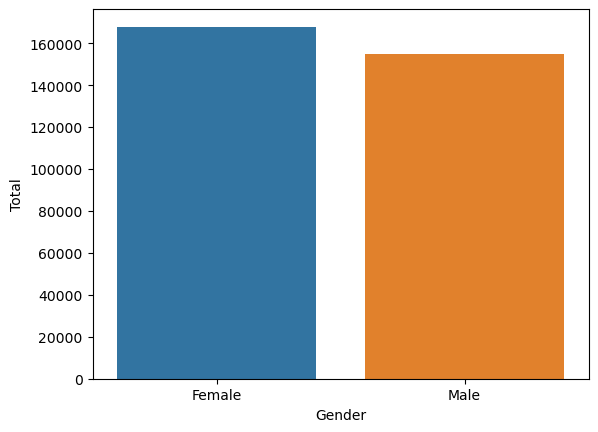

In [10]:
sns.barplot(data = df_men_women, x = "Gender", y = "Total")

**The difference is rather small (approximately 4%).**

**Разница относительно небольшая, около 4%.**

### Who brought more profit, normal customers or members of the loyalty program?   /   Кто принес больше прибыли, обычные покупатели или участники программы лояльности?

In [11]:
df_customer_type = df[['Customer type','Total']].groupby(['Customer type'], as_index = False).sum().round()
df_customer_type['Total_percent'] = round(100 * df_customer_type['Total'] / df_customer_type['Total'].sum(), 2)
df_customer_type

,Customer type,Total,Total_percent
0,Member,164223.0,50.85
1,Normal,158743.0,49.15


<AxesSubplot:xlabel='Customer type', ylabel='Total'>

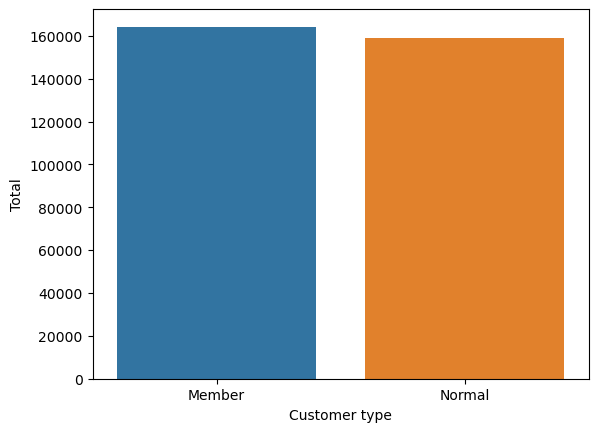

In [12]:
sns.barplot(data = df_customer_type, x = 'Customer type', y = 'Total')

**The difference is even smaller (approximately 2 %).**

**Разница еще меньше, около 2 %.**

### How many members of the loyalty program among men and women?   /   Как много участников программы лояльности среди мужчин и женщин?

In [13]:
df_customers = df[['Customer type','Gender', 'Invoice ID']].groupby(['Customer type', 'Gender'], as_index = False).count()
df_customers.rename(columns={'Invoice ID' : 'Number of customers'}, inplace=True)
df_customers

,Customer type,Gender,Number of customers
0,Member,Female,261
1,Member,Male,240
2,Normal,Female,240
3,Normal,Male,259


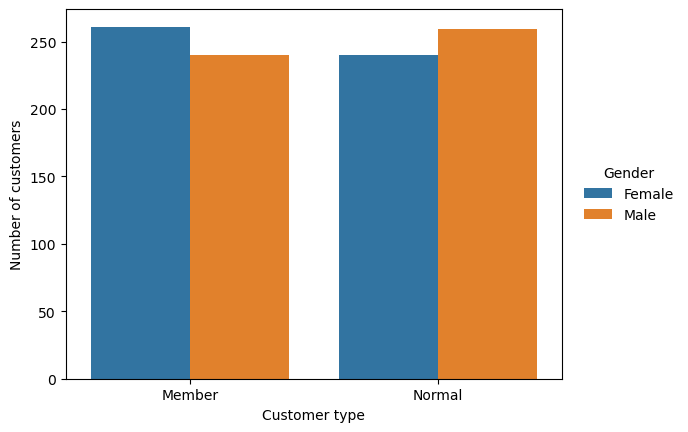

In [14]:
ax1 = sns.barplot(data = df_customers, x = 'Customer type', y = 'Number of customers', hue = 'Gender')
sns.move_legend(ax1, 'center right', bbox_to_anchor=(1.25, .5), frameon=False)

**Women slightly more often are members of the loyalty program.**

**Среди клиентов, участвующих в программе лояльности,  женщин немного больше, чем мужчин.**

### Which city had more sales?   /   В каком городе продажи были больше?

In [15]:
df_cities = df[['City','Total']].groupby(['City'], as_index = False).sum().round()
df_cities

,City,Total
0,Mandalay,106198.0
1,Naypyitaw,110569.0
2,Yangon,106200.0


In [16]:
labels = df_cities["City"].value_counts().index

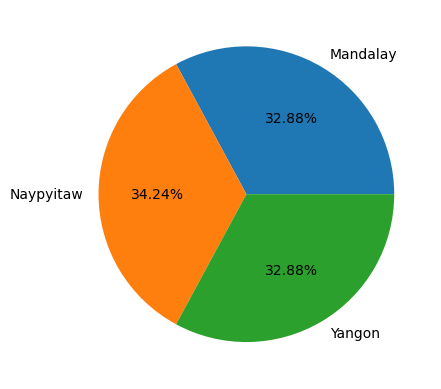

In [17]:
plt.pie(df_cities["Total"], labels = labels, autopct='%.2f%%')
plt.show()

**Values (total purchases) are pretty similar again. Naypyitaw has 1.36% more than Mandalay or Yangon.**

**Опять очень близкие значения. В Naypyitaw продажи были на ~1,36% больше, чем в Mandalay или Yangon.**

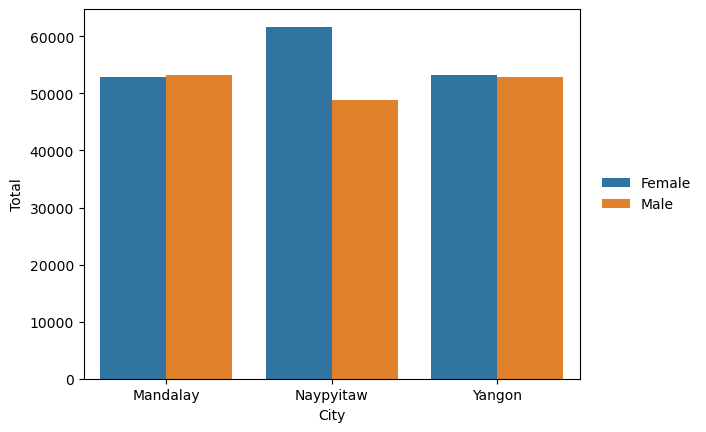

In [18]:
# Is there any gender-based difference between total purchases in cities?   \   Проверим различия в суммарной стоимости покупок по городам в зависимости от пола 

df_cities_gender = df[['City', 'Gender','Total']].groupby(['City', 'Gender'], as_index = False).sum().round()
ax2 = sns.barplot(data = df_cities_gender, x = "City", y = "Total", hue = 'Gender')
sns.move_legend(ax2, 'center right', bbox_to_anchor=(1.25, .5), title=None, frameon=False)

**This 1.36% was provided by women.**

**Женщины обеспечили разницу на 1,36% между Naypyitaw и Mandalay (или Yangon).**

### Which product line brought in the most profit?   /   Какая категория товаров приносит больше прибыли?

In [19]:
df_goods = df[['Product line','Total']].groupby(['Product line'], as_index = False).sum().round()
df_goods.sort_values('Total', ascending=False)

,Product line,Total
2,Food and beverages,56145.0
5,Sports and travel,55123.0
0,Electronic accessories,54338.0
1,Fashion accessories,54306.0
4,Home and lifestyle,53862.0
3,Health and beauty,49194.0


<AxesSubplot:xlabel='Product line', ylabel='Total'>

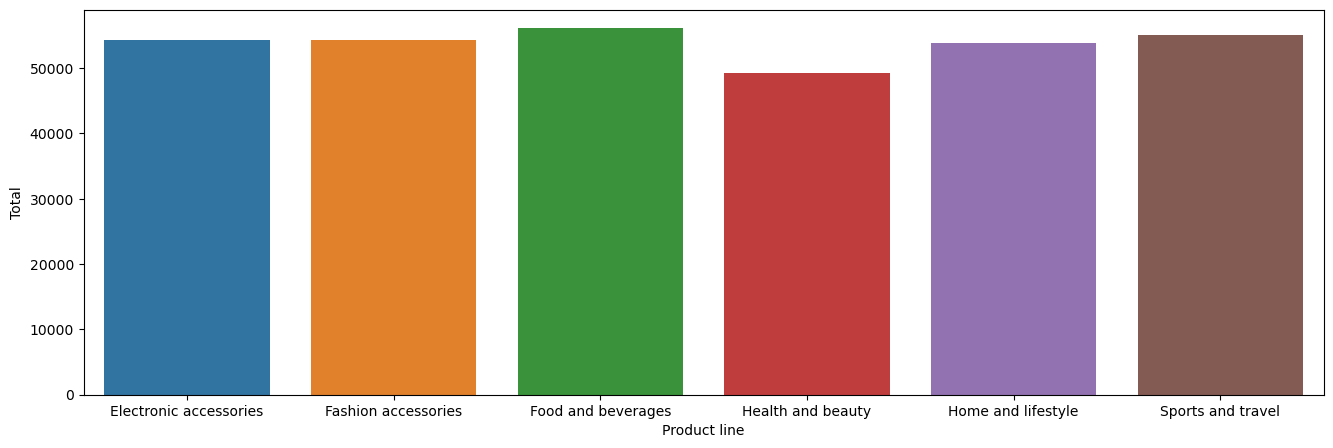

In [20]:
plt.figure(figsize = (16,5))
sns.barplot(data = df_goods, x = "Product line", y = "Total")

In [21]:
labels = df_goods["Product line"].value_counts().index

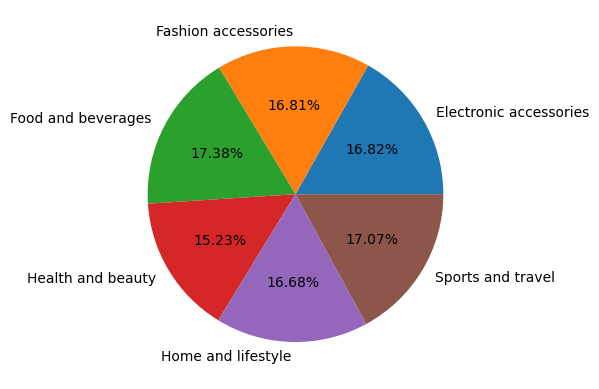

In [22]:
plt.pie(df_goods["Total"], labels = labels, autopct='%.2f%%')
plt.show()

**And again. Values are pretty close. Nevertheless the most profitable product line is "Food and beverages", the least profitable product line is "Health and beauty".**

**Мы снова имеем весьма близкие значения. Тем не менее, наибольшую прибыль принесла категория товаров "Еда и напитки", наименьшую прибыль - "Товары для здоровья и красоты".**

### What days/months had the highest profit?   /   В какие дни/месяцы была наибольшая прибыль?

In [23]:
# Creating new df with additional columns 'dow' (day of week), 'dow_name' and 'Month'   \   Создадим новую таблицу с дополнительными колонками 'dow' (день недели), 'dow_name' and 'Month'

df_dates = df[['Customer type','Gender', 'Product line', 'Date', 'Total']].copy().sort_values('Date')
df_dates['dow_name'] = df['Date'].dt.day_name()
df_dates['Month'] = df_dates['Date'].dt.month_name()
df_dates['dow'] = df_dates['Date'].dt.dayofweek
df_dates

,Customer type,Gender,Product line,Date,Total,dow_name,Month,dow
856,Normal,Male,Food and beverages,2019-01-01,177.408,Tuesday,January,1
567,Normal,Female,Fashion accessories,2019-01-01,621.243,Tuesday,January,1
245,Member,Male,Home and lifestyle,2019-01-01,399.756,Tuesday,January,1
696,Member,Female,Sports and travel,2019-01-01,113.568,Tuesday,January,1
523,Normal,Male,Health and beauty,2019-01-01,132.027,Tuesday,January,1
...,...,...,...,...,...,...,...,...
158,Member,Male,Health and beauty,2019-03-30,918.729,Saturday,March,5
881,Member,Female,Fashion accessories,2019-03-30,85.512,Saturday,March,5
963,Member,Male,Electronic accessories,2019-03-30,304.983,Saturday,March,5
937,Normal,Female,Sports and travel,2019-03-30,469.770,Saturday,March,5


In [24]:
df_months = df_dates[['Month', 'Total']].groupby(['Month'], as_index = False).sum()
df_months

,Month,Total
0,February,97219.374
1,January,116291.868
2,March,109455.507


<AxesSubplot:xlabel='Month', ylabel='Total'>

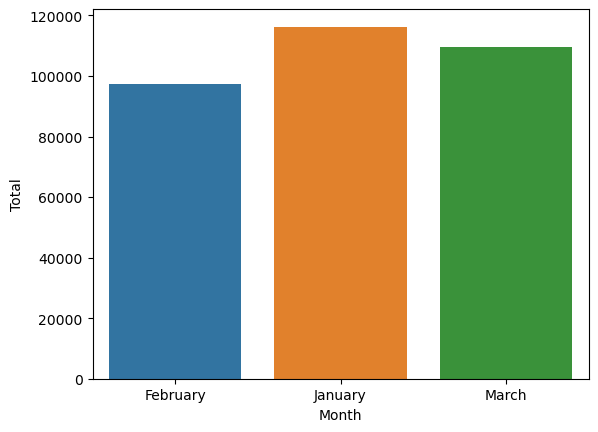

In [25]:
sns.barplot(data = df_months, x = "Month", y = "Total")

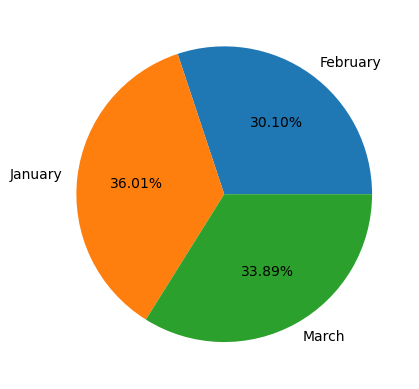

In [26]:
labels = df_months["Month"].value_counts().index
plt.pie(df_months["Total"], labels = labels, autopct='%.2f%%')
plt.show()

**The most profitable month was January, the least profitable month was February.  
But! February 2019 had 28 days versus 31 day for March.  
"Specific profit" for February was 3472 \\$ /day,  
for March - 3530 \\$/day,  
for January - 3751 \$/day.**

**Самый прибыльный месяц - Январь, наименее прибыльный - Февраль.  
Но стоит отметить, что в Феврале 2019 года было 28 дней (против 31 дня в Марте).  
Удельная прибыль для Февраля составила 3472 \\$/день, что очень близко к 3530 \\$/день для Марта.  
Удельная прибыль для января - 3751 \$/день.**

In [27]:
df_dow = df_dates[['dow_name', 'dow', 'Total']].groupby(['dow_name', 'dow'], as_index = False).sum().sort_values('dow')
df_dow

,dow_name,dow,Total
1,Monday,0,37899.0780
5,Tuesday,1,51482.2455
6,Wednesday,2,43731.1350
4,Thursday,3,45349.2480
0,Friday,4,43926.3405
2,Saturday,5,56120.8095
3,Sunday,6,44457.8925


<AxesSubplot:xlabel='dow_name', ylabel='Total'>

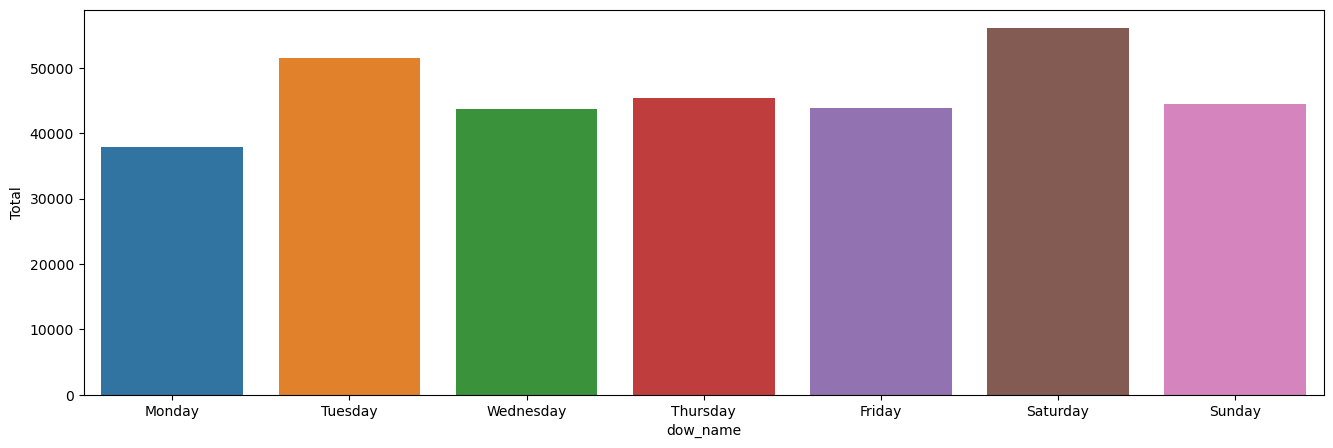

In [28]:
plt.figure(figsize = (16,5))
sns.barplot(data = df_dow, x = "dow_name", y = "Total")

**Looks like the most profitable day of week was Saturday, the least profitable day - Monday.**

**Похоже, что наиболее прибыльный день - суббота, наименее прибыльный - понедельник.** 

---

**Let's dig up some more and try to find out is there any difference in "dow"-sales based on gender or type of customer.**

**Немного углубимся и посмотрим есть ли различия в покупках по дням недели в срезах пола и типа покупателя.**

In [29]:
df_dow_membership = df_dates[['Customer type','dow_name', 'dow', 'Total']].groupby(['Customer type','dow_name', 'dow'], as_index = False).sum().sort_values('dow')
df_dow_membership

,Customer type,dow_name,dow,Total
1,Member,Monday,0,18355.0710
8,Normal,Monday,0,19544.0070
5,Member,Tuesday,1,28689.4650
12,Normal,Tuesday,1,22792.7805
6,Member,Wednesday,2,22944.9150
13,Normal,Wednesday,2,20786.2200
4,Member,Thursday,3,18393.6375
11,Normal,Thursday,3,26955.6105
0,Member,Friday,4,22183.8435
7,Normal,Friday,4,21742.4970


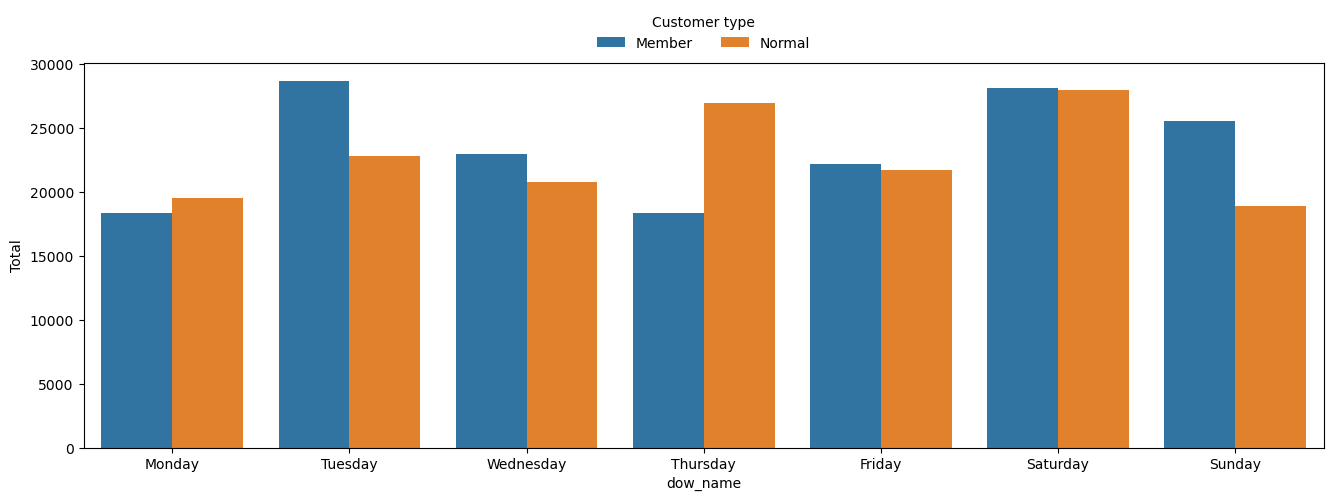

In [30]:
plt.figure(figsize = (16,5))
ax3 = sns.barplot(data = df_dow_membership, x = "dow_name", y = "Total", hue = 'Customer type')
sns.move_legend(ax3, 'lower center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=False)

**On Saturday, which is the most profitable day of week, there are about the same number of normal customers and members of the loyalty program. On Tuesday and Sunday, there are significantly more loyalty program members than normal customers. Perhaps these days there were special promotions for the members.**

**По субботам, которая является самым прибыльным днем недели, обычных покупателей и участников программы лояльности примерно одинаковое количество. Во вторник и воскресенье участников программы лояльности значительно больше, чем обычных покупателей. Возможно, в эти дни проходили специальные акции для участников программы лояльности.**

In [31]:
df_dow_gender = df_dates[['Gender','dow_name', 'dow', 'Total']].groupby(['Gender','dow_name', 'dow'], as_index = False).sum().sort_values('dow')
df_dow_gender

,Gender,dow_name,dow,Total
1,Female,Monday,0,20412.0105
8,Male,Monday,0,17487.0675
5,Female,Tuesday,1,30431.9715
12,Male,Tuesday,1,21050.2740
6,Female,Wednesday,2,19936.6335
13,Male,Wednesday,2,23794.5015
4,Female,Thursday,3,20523.5100
11,Male,Thursday,3,24825.7380
0,Female,Friday,4,24147.8055
7,Male,Friday,4,19778.5350


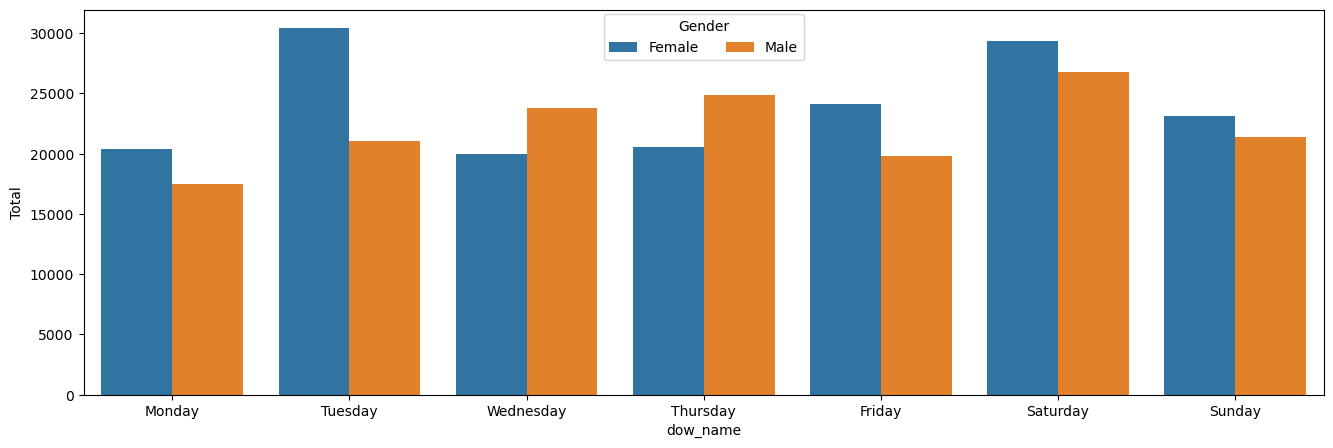

In [32]:
plt.figure(figsize = (16,5))
ax4 = sns.barplot(data = df_dow_gender, x = "dow_name", y = "Total", hue = 'Gender')
sns.move_legend(ax4, 'lower center', bbox_to_anchor=(0.5, 0.85), ncol=2)

In [33]:
df_dow_products = df_dates[['Product line','dow_name', 'dow', 'Total']].groupby(['Product line','dow_name', 'dow'], as_index = False).sum().sort_values('dow')
df_dow_products

,Product line,dow_name,dow,Total
1,Electronic accessories,Monday,0,5922.1260
36,Sports and travel,Monday,0,4401.6210
29,Home and lifestyle,Monday,0,6095.3445
8,Fashion accessories,Monday,0,6419.5215
22,Health and beauty,Monday,0,8448.2370
15,Food and beverages,Monday,0,6612.2280
33,Home and lifestyle,Tuesday,1,7708.7325
5,Electronic accessories,Tuesday,1,10110.9225
26,Health and beauty,Tuesday,1,8559.5895
40,Sports and travel,Tuesday,1,7831.4250


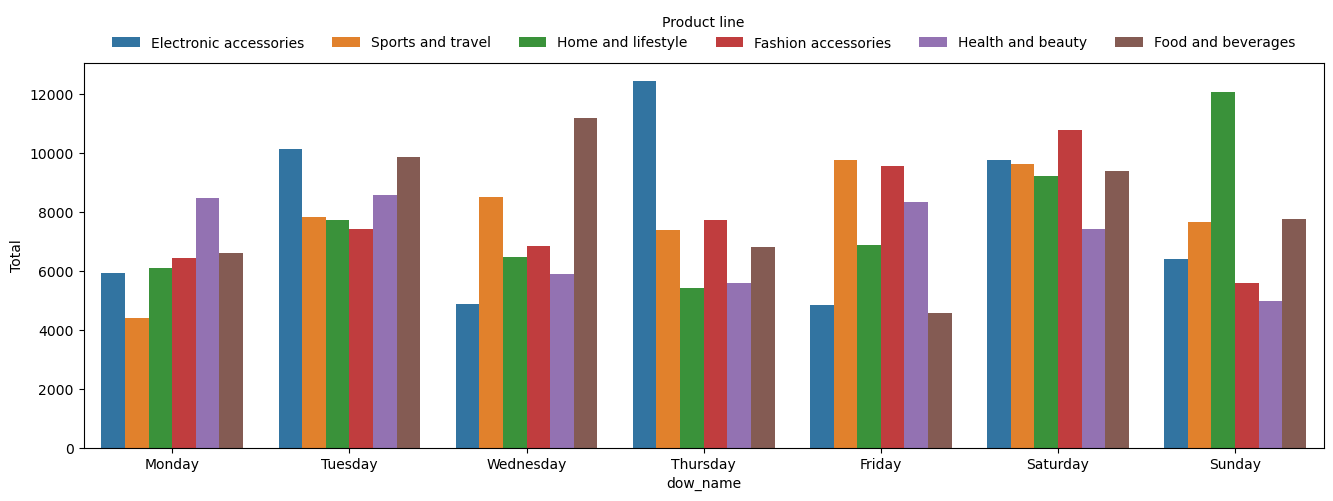

In [34]:
plt.figure(figsize = (16,5))
ax5 = sns.barplot(data = df_dow_products, x = "dow_name", y = "Total", hue = 'Product line')
sns.move_legend(ax5, 'lower center', bbox_to_anchor=(0.5, 1), ncol=6, frameon=False)

### What are the differences in Product lines sales based on gender?   /   Как различаются продажи по категориям товаров с учетом пола покупателей?

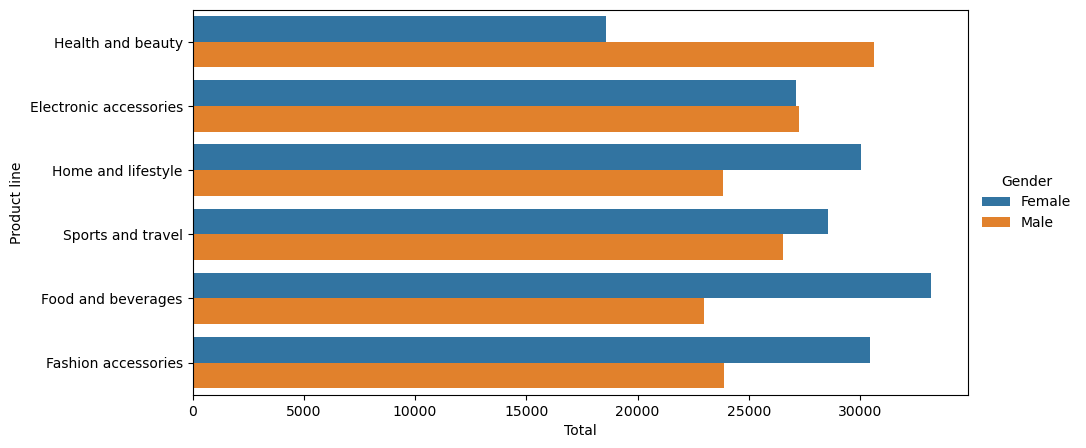

In [35]:
plt.figure(figsize = (10,5))
ax6 = sns.barplot(y='Product line', x = 'Total', hue = 'Gender', data = df, estimator = sum, ci = None)
sns.move_legend(ax6, 'center right', bbox_to_anchor=(1.15, .5), frameon=False)

[Text(0.5, 0, 'Number of purchases')]

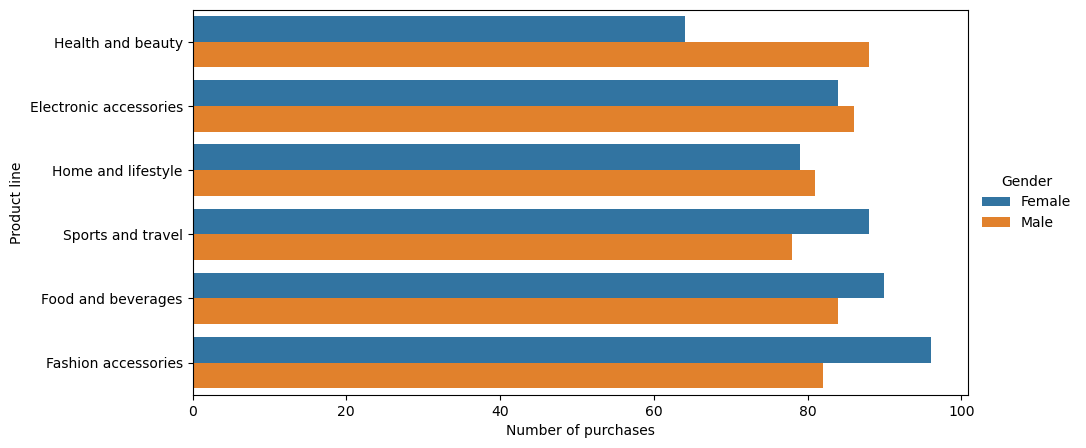

In [36]:
plt.figure(figsize = (10,5))
ax7 = sns.barplot(y='Product line', x = 'Total', hue = 'Gender', data = df, estimator = len, ci = None)
sns.move_legend(ax7, 'center right', bbox_to_anchor=(1.15, .5), frameon=False)
ax7.set(xlabel='Number of purchases')

**'Health and beauty' - surprisingly, this category had more purchases and total spendings by men;  
'Electronic accessories' - purchases and total spendings are approximately the same;  
'Home and lifestyle' - the number of purchases is about the same, but the total spendings is much higher for women;  
'Sports and travel' - the number of purchases and total spendings is higher for women;  
'Food and beverages' - the number of purchases and total spendings is higher for women (moreover, total spendings is much higher compared to men);  
'Fashion accessories' - the number of purchases and total spendings is higher for women.**

**'Health and beauty' - на удивление, в этой категории больше покупок и суммарных трат у мужчин;  
'Electronic accessories' - покупки и суммарные траты в зависимости от пола покупателя примерно одинаковые;  
'Home and lifestyle' - количество покупок примерно одинаковое, но суммарные траты значительно больше у женщин;  
'Sports and travel' - количество покупок и суммарные траты больше у женщин;  
'Food and beverages' - количество покупок и суммарные траты больше у женщин (причем, суммарные траты значительно больше, чем у мужчин);  
'Fashion accessories' - количество покупок и суммарные траты больше у женщин.**

### How do buyers prefer to pay?   /   Как предпочитают платить покупатели?

In [37]:
df_payment_type = df[['Customer type','Gender', 'Payment']].groupby(['Customer type', 'Gender', 'Payment'], as_index = False).value_counts()
df_payment_type.sort_values(['Customer type', 'count'], ascending = False)

,Customer type,Gender,Payment,count
11,Normal,Male,Ewallet,105
6,Normal,Female,Cash,88
9,Normal,Male,Cash,88
8,Normal,Female,Ewallet,79
7,Normal,Female,Credit card,73
10,Normal,Male,Credit card,66
0,Member,Female,Cash,90
1,Member,Female,Credit card,90
4,Member,Male,Credit card,82
2,Member,Female,Ewallet,81


In [38]:
df_payment_type.pivot_table(index = ['Payment'], columns = ['Customer type','Gender']) #margins=True# )

count                 
Customer type Member      Normal     
Gender        Female Male Female Male
Payment                              
Cash              90   78     88   88
Credit card       90   82     73   66
Ewallet           81   80     79  105

In [39]:
df_payment_type = df_payment_type.rename(columns = {'Customer type': 'Customer_type'})
df_payment_type

,Customer_type,Gender,Payment,count
0,Member,Female,Cash,90
1,Member,Female,Credit card,90
2,Member,Female,Ewallet,81
3,Member,Male,Cash,78
4,Member,Male,Credit card,82
5,Member,Male,Ewallet,80
6,Normal,Female,Cash,88
7,Normal,Female,Credit card,73
8,Normal,Female,Ewallet,79
9,Normal,Male,Cash,88


Text(0.5, 1.0, 'Payment type prefered by members of loyalty program')

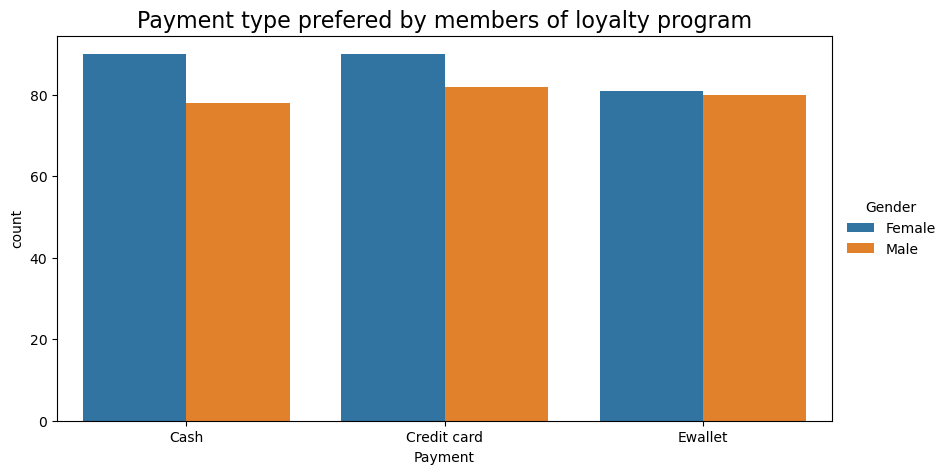

In [40]:
plt.figure(figsize = (10,5))
ax7 = sns.barplot(data = df_payment_type.query("Customer_type == 'Member'"), x = "Payment", y = "count", hue = 'Gender')
sns.move_legend(ax7, 'center right', bbox_to_anchor=(1.15, .5), frameon=False)
ax7.set_title('Payment type prefered by members of loyalty program', fontdict= { 'fontsize': 16})

Text(0.5, 1.0, 'Payment type prefered by normal customers')

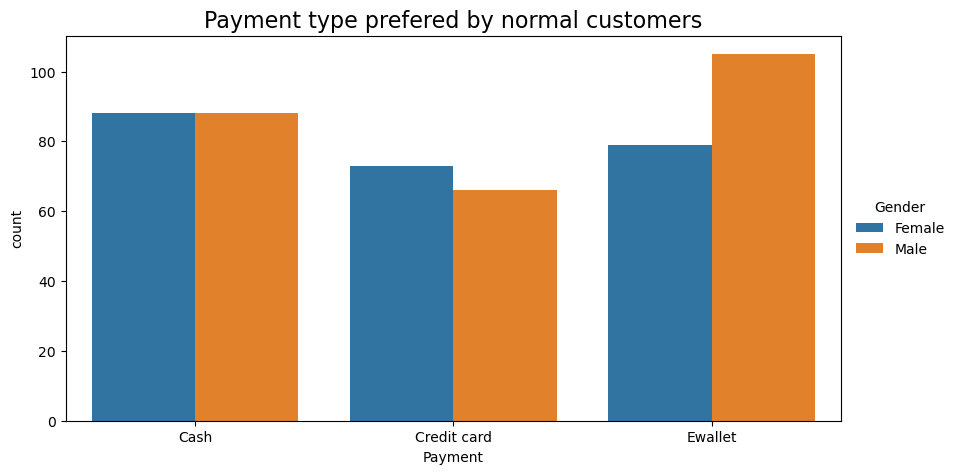

In [41]:
plt.figure(figsize = (10,5))
ax8 = sns.barplot(data = df_payment_type.query("Customer_type == 'Normal'"), x = "Payment", y = "count", hue = 'Gender')
sns.move_legend(ax8, 'center right', bbox_to_anchor=(1.15, .5), frameon=False)
ax8.set_title('Payment type prefered by normal customers', fontdict= { 'fontsize': 16})

**Members of the loyalty program:** ***there were no particular preferences among men, women used cash and cards a little more often.***  
**Normal customers:** ***men prefered Ewallet, women preferences weren't so clear, credit card payments are the least popular among both genders.***

**Участники программы лояльности:** ***среди мужчин особых предпочтений не наблюдается, женщины чуть чаще платили наличкой и картами.***  
**Обычные покупатели:** ***мужчины предпочитали Ewallet, у женщин предпочтения не выражены так ярко, оплата кредитнымы картами наименее популярна у обоих полов.***

### What is the average and maximum rating for product lines?   /   Каков средний и максимальный рейтинг по категориям товаров?

In [42]:
df_goods_rating_avg = df[['Product line','Rating']].groupby(['Product line'], as_index = False).mean().round(2)
df_goods_rating_avg

,Product line,Rating
0,Electronic accessories,6.92
1,Fashion accessories,7.03
2,Food and beverages,7.11
3,Health and beauty,7.00
4,Home and lifestyle,6.84
5,Sports and travel,6.92


In [43]:
df_goods_rating_max = df[['Product line','Rating']].groupby(['Product line'], as_index = False).max().round(2)
df_goods_rating_max

,Product line,Rating
0,Electronic accessories,10.0
1,Fashion accessories,9.9
2,Food and beverages,9.9
3,Health and beauty,10.0
4,Home and lifestyle,9.9
5,Sports and travel,10.0


**To be honest, nothing special.**

**Ничего интересного, честно говоря.**

### What is the daily Average Order Value (AOV) in supermarkets?   /   Какой ежедневный средний чек в супермаркетах?

In [44]:
df_aov_all = df[['Date','Total']].groupby(['Date'], as_index = False).mean().round(2)
df_aov_all.rename(columns={'Total':'AOV'}, inplace=True)
df_aov_all

,Date,AOV
0,2019-01-01,395.43
1,2019-01-02,243.19
2,2019-01-03,259.77
3,2019-01-04,270.61
4,2019-01-05,294.72
...,...,...
84,2019-03-26,150.96
85,2019-03-27,290.28
86,2019-03-28,222.94
87,2019-03-29,502.91


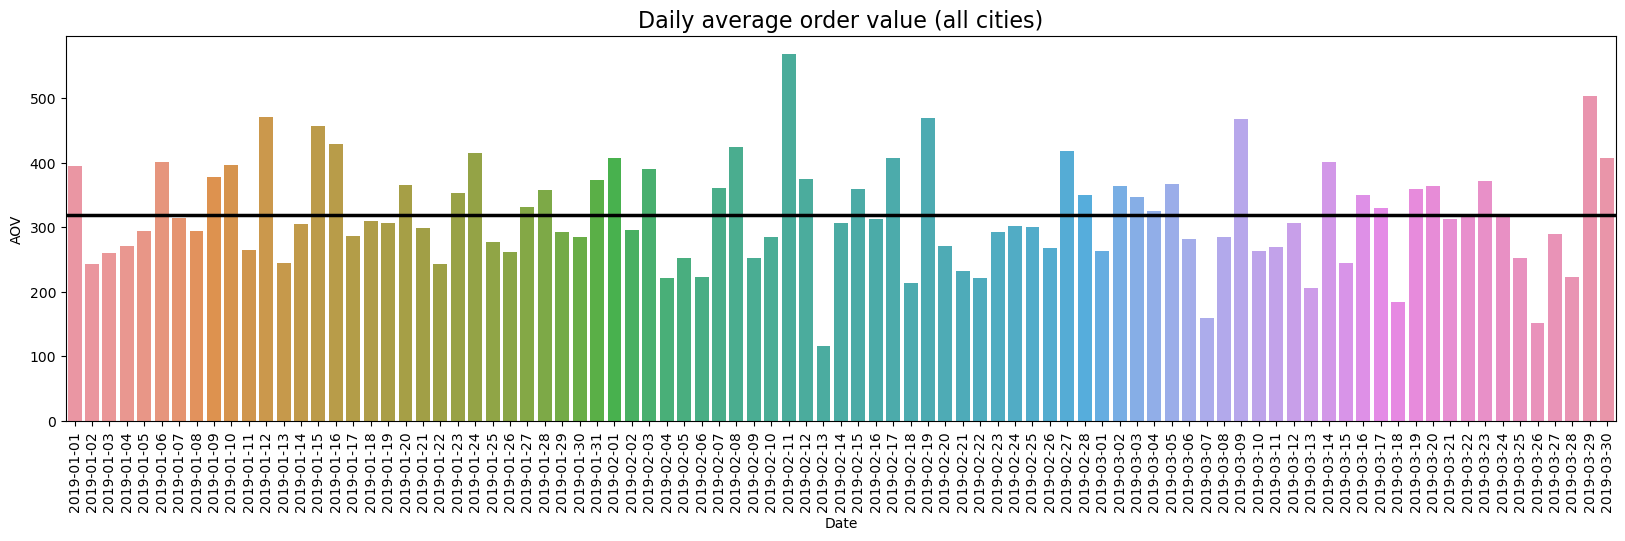

In [45]:
plt.figure(figsize = (20,5))
ax9 = sns.barplot(data = df_aov_all, x = "Date", y = "AOV")
ax9.set_title('Daily average order value (all cities)', fontdict= { 'fontsize': 16})
ax9.set_xticklabels(df_aov_all['Date'].dt.date, rotation=90)
ax9.axhline(df_aov_all['AOV'].mean(), c='k', ls='-', lw=2.5)

In [46]:
df_daily_aov_by_city = df[['City', 'Date','Total']].groupby(['City','Date'], as_index = False).mean().round(2)
df_daily_aov_by_city.rename(columns={'Total':'AOV'}, inplace=True)
df_daily_aov_by_city

,City,Date,AOV
0,Mandalay,2019-01-01,512.23
1,Mandalay,2019-01-02,290.70
2,Mandalay,2019-01-03,338.90
3,Mandalay,2019-01-04,170.19
4,Mandalay,2019-01-05,162.25
...,...,...,...
258,Yangon,2019-03-26,197.89
259,Yangon,2019-03-27,212.13
260,Yangon,2019-03-28,275.49
261,Yangon,2019-03-29,488.81


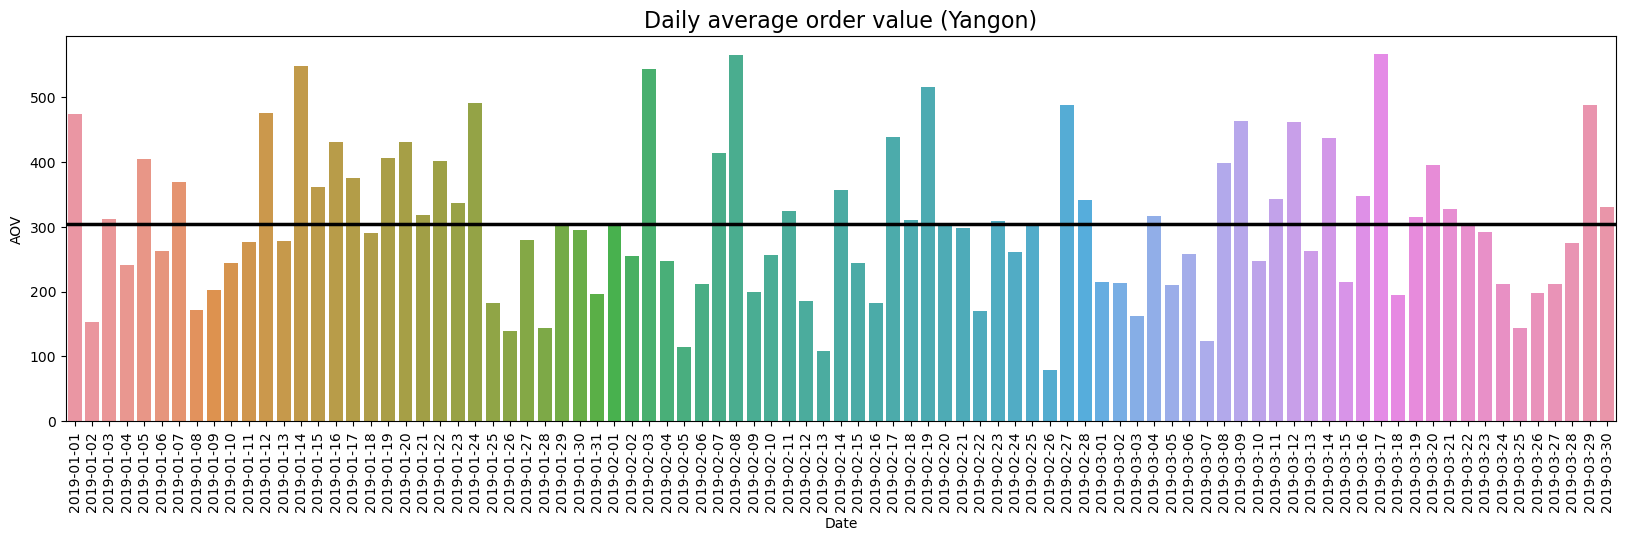

In [47]:
plt.figure(figsize = (20,5))
ax10 = sns.barplot(data = df_daily_aov_by_city.query("City=='Yangon'"), x = "Date", y = "AOV")
ax10.set_title('Daily average order value (Yangon)', fontdict= { 'fontsize': 16})
ax10.set_xticklabels(df_daily_aov_by_city.query("City=='Yangon'")['Date'].dt.date, rotation=90)
ax10.axhline(df_daily_aov_by_city.query("City=='Yangon'")['AOV'].mean(), c='k', ls='-', lw=2.5)

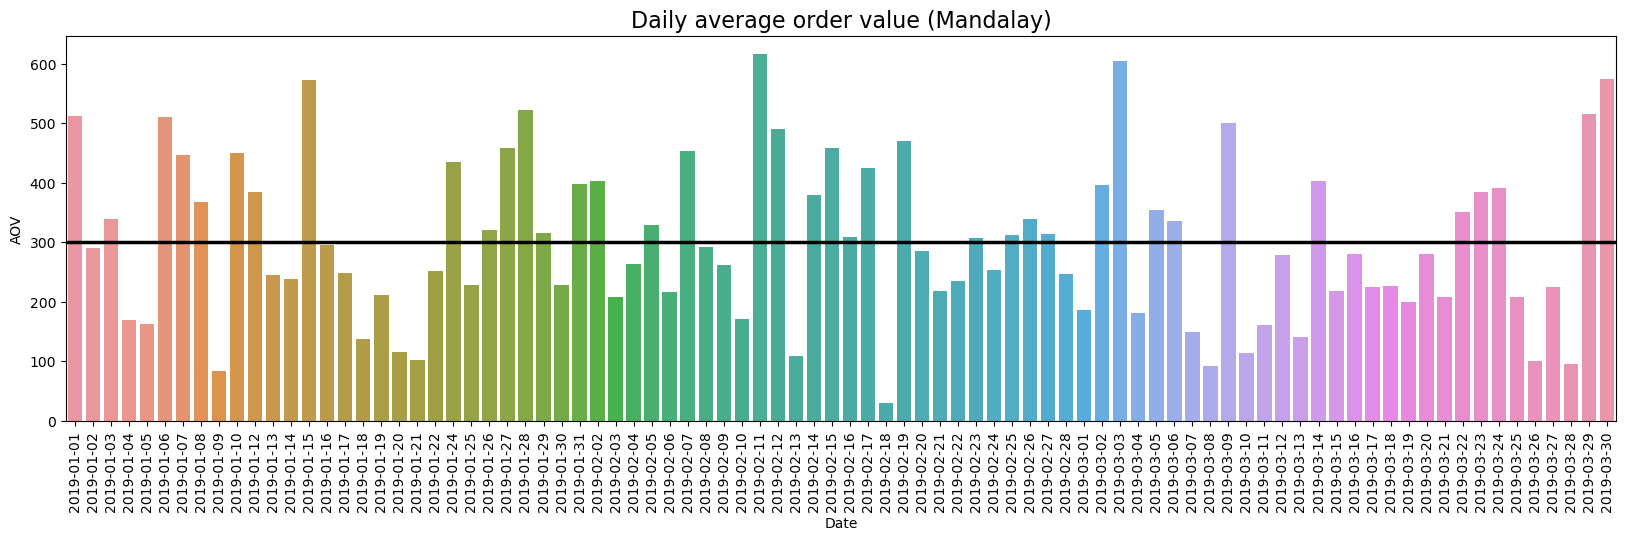

In [48]:
plt.figure(figsize = (20,5))
ax11 = sns.barplot(data = df_daily_aov_by_city.query("City=='Mandalay'"), x = "Date", y = "AOV")
ax11.set_title('Daily average order value (Mandalay)', fontdict= { 'fontsize': 16})
ax11.set_xticklabels(df_daily_aov_by_city.query("City=='Mandalay'")['Date'].dt.date, rotation=90)
ax11.axhline(df_daily_aov_by_city.query("City=='Mandalay'")['AOV'].mean(), c='k', ls='-', lw=2.5)

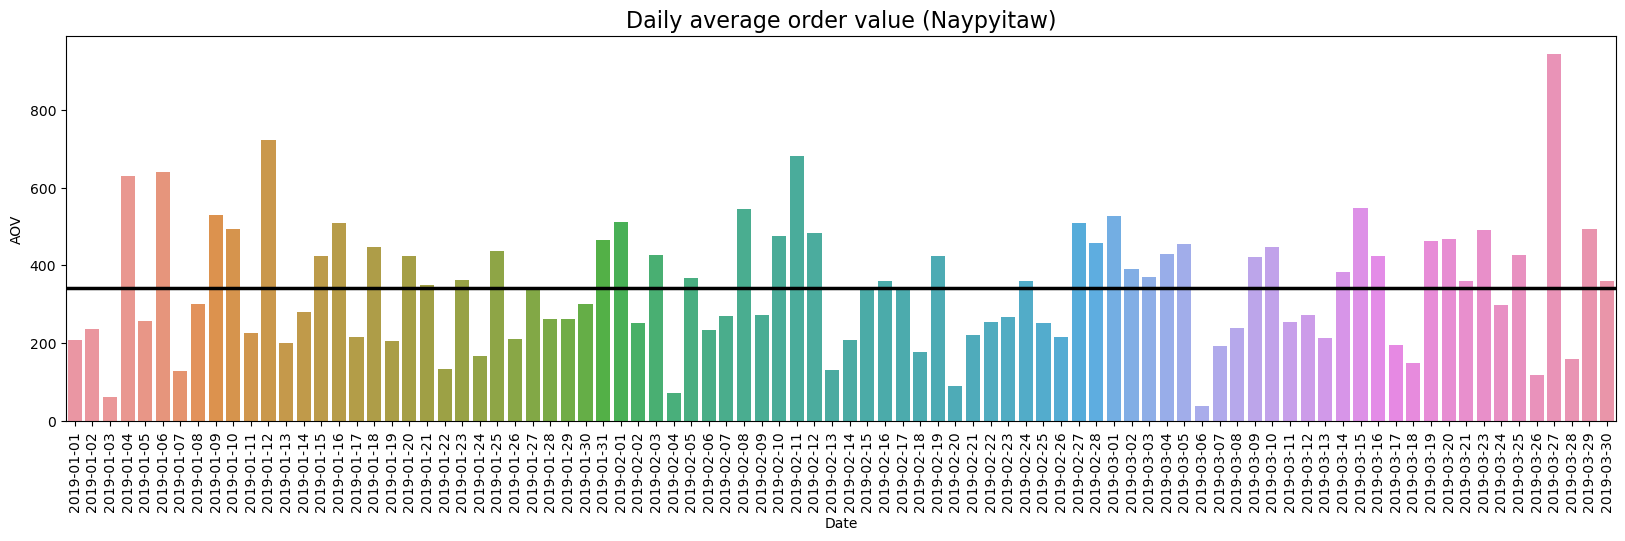

In [49]:
plt.figure(figsize = (20,5))
ax12 = sns.barplot(data = df_daily_aov_by_city.query("City=='Naypyitaw'"), x = "Date", y = "AOV")
ax12.set_title('Daily average order value (Naypyitaw)', fontdict= { 'fontsize': 16})
ax12.set_xticklabels(df_daily_aov_by_city.query("City=='Naypyitaw'")['Date'].dt.date, rotation=90)
ax12.axhline(df_daily_aov_by_city.query("City=='Naypyitaw'")['AOV'].mean(), c='k', ls='-', lw=2.5)

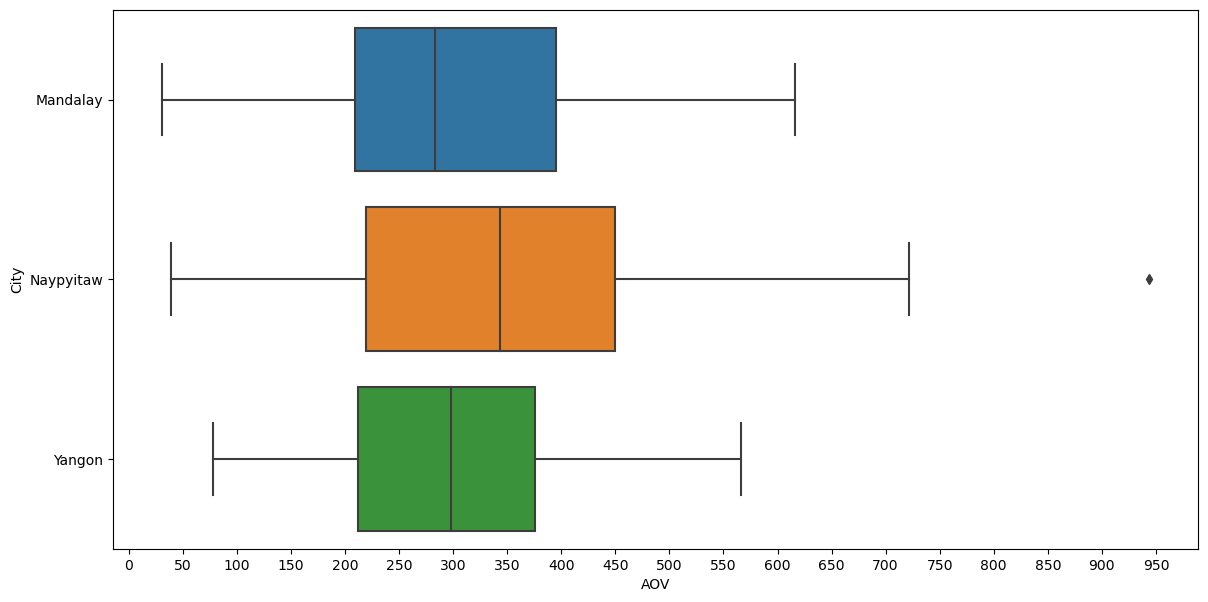

In [50]:
plt.figure(figsize = (14,7))
ax17 = sns.boxplot(data=df_daily_aov_by_city, y="City", x="AOV")
ax17.set_xticks([x for x in range(0,1000,50)])

In [51]:
df_daily_aov_by_customer = df[['Customer type', 'Date','Total']].groupby(['Customer type','Date'], as_index = False).mean().round(2)
df_daily_aov_by_customer.rename(columns={'Total':'AOV', 'Customer type':'Customer_type'}, inplace=True)
df_daily_aov_by_customer

,Customer_type,Date,AOV
0,Member,2019-01-01,458.94
1,Member,2019-01-02,304.08
2,Member,2019-01-03,214.94
3,Member,2019-01-04,295.49
4,Member,2019-01-05,259.12
...,...,...,...
173,Normal,2019-03-26,155.76
174,Normal,2019-03-27,281.92
175,Normal,2019-03-28,205.97
176,Normal,2019-03-29,580.19


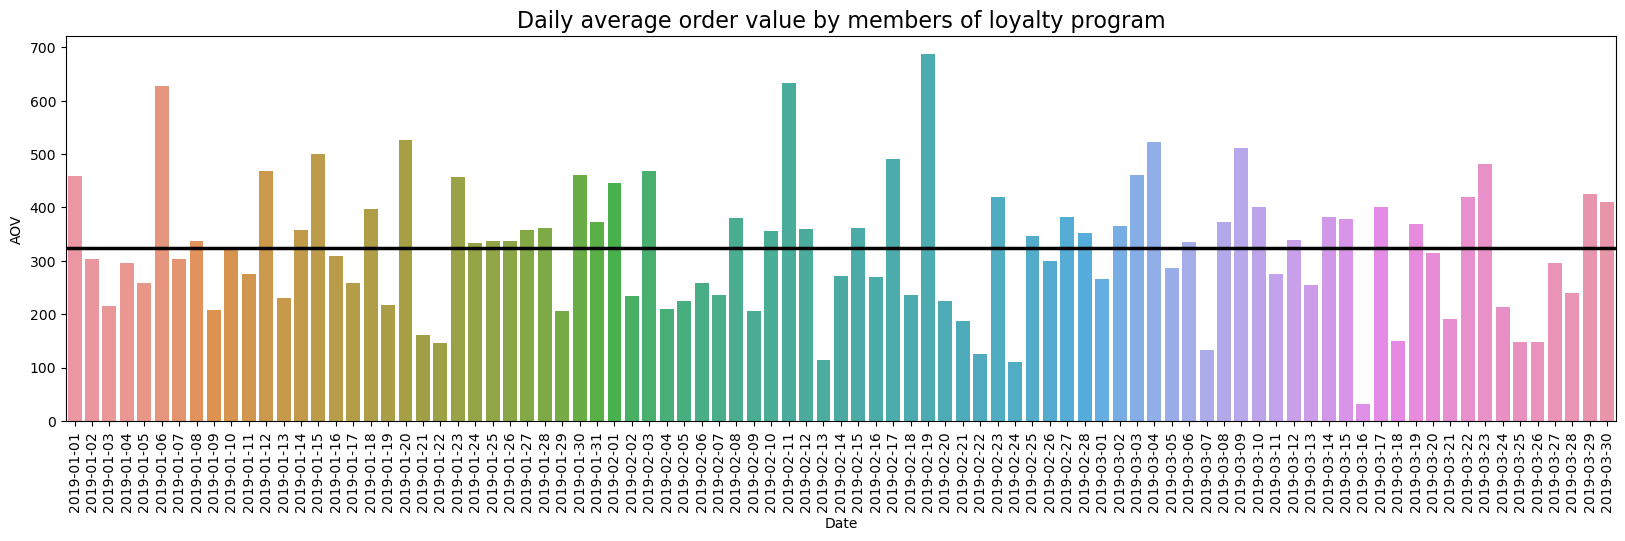

In [52]:
plt.figure(figsize = (20,5))
ax13 = sns.barplot(data = df_daily_aov_by_customer.query("Customer_type=='Member'"), x = "Date", y = "AOV")
ax13.set_title('Daily average order value by members of loyalty program', fontdict= { 'fontsize': 16})
ax13.set_xticklabels(df_daily_aov_by_customer.query("Customer_type=='Member'")['Date'].dt.date, rotation=90)
ax13.axhline(df_daily_aov_by_customer.query("Customer_type=='Member'")['AOV'].mean(), c='k', ls='-', lw=2.5)

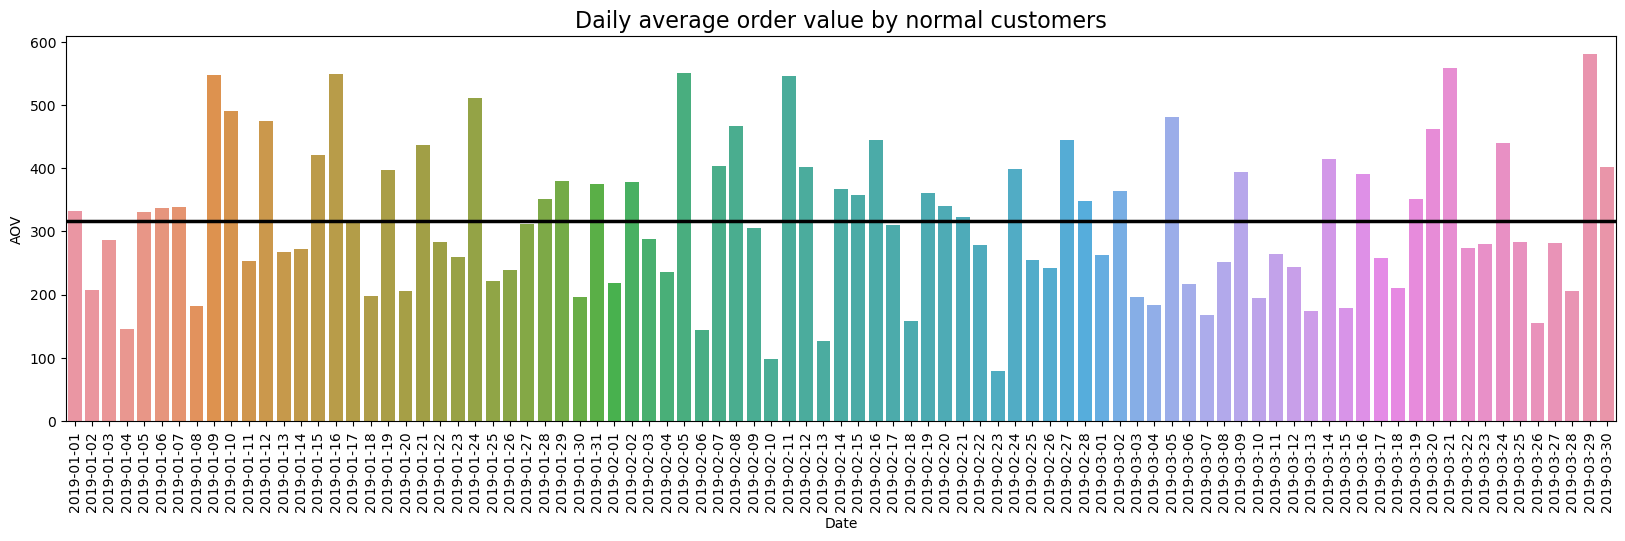

In [53]:
plt.figure(figsize = (20,5))
ax14 = sns.barplot(data = df_daily_aov_by_customer.query("Customer_type=='Normal'"), x = "Date", y = "AOV")
ax14.set_title('Daily average order value by normal customers', fontdict= { 'fontsize': 16})
ax14.set_xticklabels(df_daily_aov_by_customer.query("Customer_type=='Normal'")['Date'].dt.date, rotation=90)
ax14.axhline(df_daily_aov_by_customer.query("Customer_type=='Normal'")['AOV'].mean(), c='k', ls='-', lw=2.5)

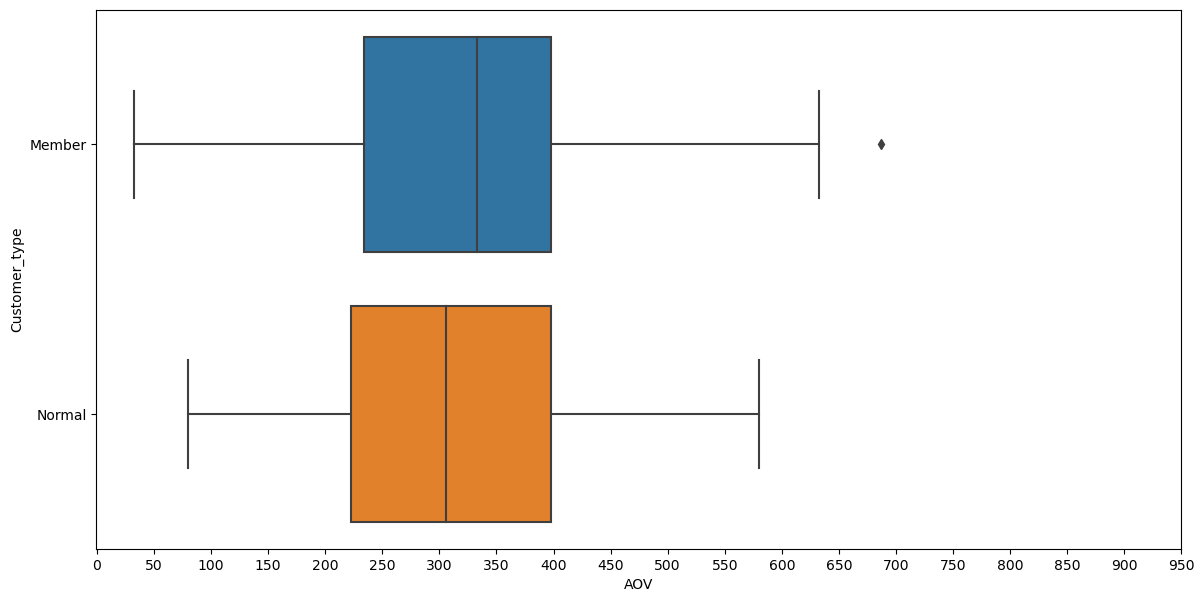

In [54]:
plt.figure(figsize = (14,7))
ax18 = sns.boxplot(data=df_daily_aov_by_customer, y="Customer_type", x="AOV")
ax18.set_xticks([x for x in range(0,1000,50)])

In [55]:
df_daily_aov_by_gender = df[['Gender', 'Date','Total']].groupby(['Gender','Date'], as_index = False).mean().round(2)
df_daily_aov_by_gender.rename(columns={'Total':'AOV'}, inplace=True)
df_daily_aov_by_gender

,Gender,Date,AOV
0,Female,2019-01-01,447.32
1,Female,2019-01-02,312.62
2,Female,2019-01-03,253.01
3,Female,2019-01-04,430.53
4,Female,2019-01-05,311.55
...,...,...,...
173,Male,2019-03-26,172.59
174,Male,2019-03-27,354.16
175,Male,2019-03-28,225.48
176,Male,2019-03-29,507.60


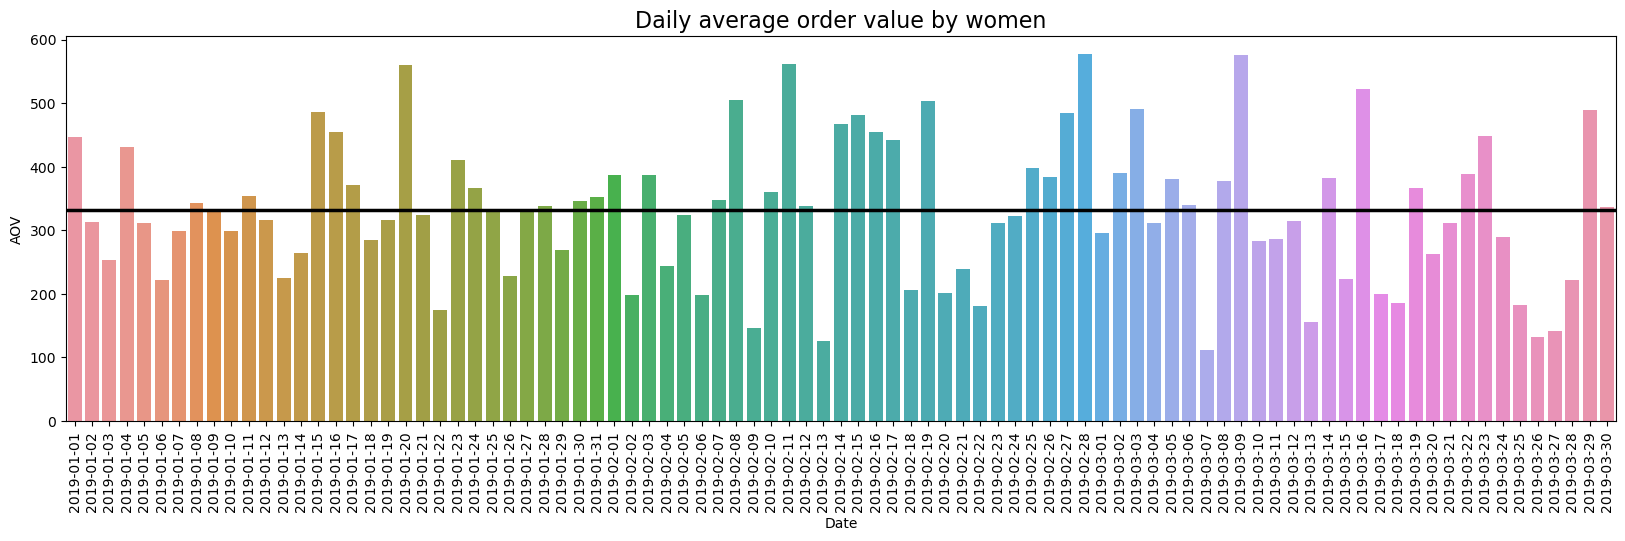

In [56]:
plt.figure(figsize = (20,5))
ax15 = sns.barplot(data = df_daily_aov_by_gender.query("Gender=='Female'"), x = "Date", y = "AOV")
ax15.set_title('Daily average order value by women', fontdict= { 'fontsize': 16})
ax15.set_xticklabels(df_daily_aov_by_gender.query("Gender=='Female'")['Date'].dt.date, rotation=90)
ax15.axhline(df_daily_aov_by_gender.query("Gender=='Female'")['AOV'].mean(), c='k', ls='-', lw=2.5)

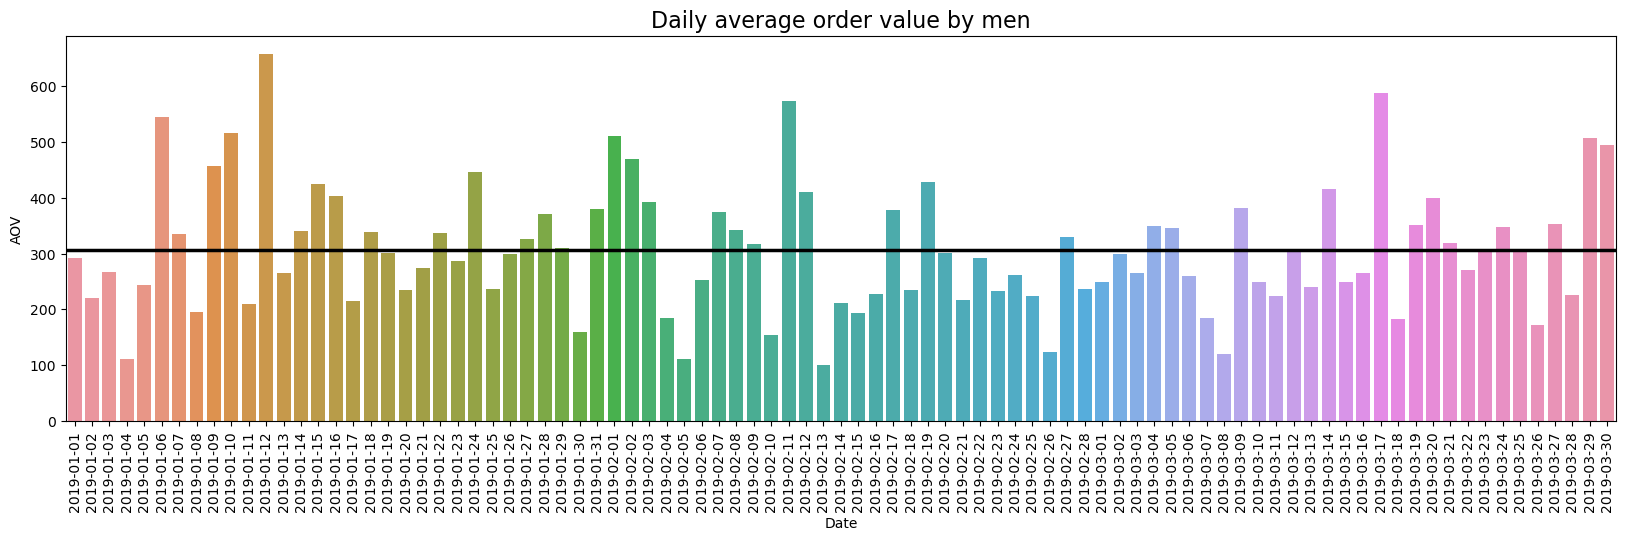

In [57]:
plt.figure(figsize = (20,5))
ax16 = sns.barplot(data = df_daily_aov_by_gender.query("Gender=='Male'"), x = "Date", y = "AOV")
ax16.set_title('Daily average order value by men', fontdict= { 'fontsize': 16})
ax16.set_xticklabels(df_daily_aov_by_gender.query("Gender=='Male'")['Date'].dt.date, rotation=90)
ax16.axhline(df_daily_aov_by_gender.query("Gender=='Male'")['AOV'].mean(), c='k', ls='-', lw=2.5)

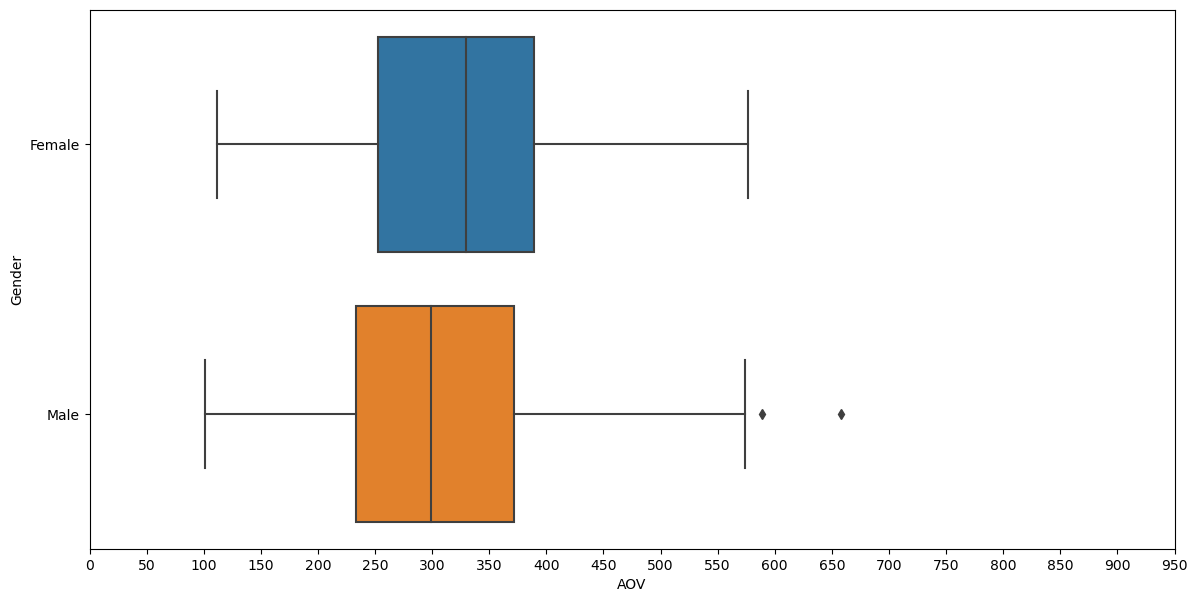

In [58]:
plt.figure(figsize = (14,7))
ax19 = sns.boxplot(data=df_daily_aov_by_gender, y="Gender", x="AOV")
ax19.set_xticks([x for x in range(0,1000,50)])

### Is there any correlation between the product line's rating and the number of purchases?   /   Есть ли корреляция между рейтингом продуктовой линейки и количеством покупок?

<AxesSubplot:xlabel='Rating', ylabel='Quantity'>

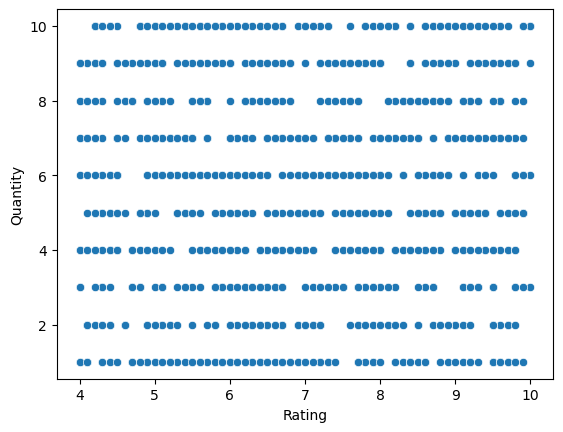

In [59]:
sns.scatterplot(data = df, x = "Rating", y = "Quantity")

In [60]:
df["Quantity"].corr(df["Unit price"]).round(4)

0.0108

**It seems like there isn't any correlation.**

**Корреляции скорее нет, чем есть.**

## Conclusions   /   Выводы

In general the data is very "smooth" and it is difficult to identify preferences or biases in many indicators. Nevertheless, we were able to find out some information.

1. Women brought about 4% more profit compared to men.  
2. Members of the loyalty program brought about 2% more profit compared to normal customers.  
3. There are slightly more women than men among the members of the loyalty program,. On the contrary, there are slightly more men among normal customers.  
4. Sales were ~1.36% higher in Naypyitaw compared to Mandalay or Yangon. Sales were the same in Mandalay and Yangon.  
5. Women provided this 1.36% higher in sales in Naypyitaw compared to Mandalay (or Yangon).  
6. Profit by product lines does not differ much. However, "Food and drinks" was the most profitable, "Health and beauty" was the least profitable.  
7. In absolute terms, the most profitable month was January, the least profitable - February. However, in terms of "Specific profit" February (3472\\$/day) is very close to March (3530\\$/day).  
8. According to the days of the week, the most profitable day is Saturday, the least profitable is Monday.  
9. There are approximately the same number of normal customers and members of the loyalty program on Saturdays. There are significantly more loyalty program members than normal customers on Tuesdays and Sundays. Perhaps there were special promotions for members of the loyalty program these days.  
10. Product lines preferences are as follows:  
- 'Health and beauty' - more purchases and total spendings by men;  
- 'Electronic accessories' - purchases and total spendings by gender of the customer were approximately the same;
- 'Home and lifestyle' - the number of purchases by gender were approximately the same, but the total spendings were much higher for women;  
- 'Sports and travel' - the number of purchases and total spendings were higher for women;  
- 'Food and beverages' - the number of purchases and total spendings were higher for women (moreover, total spendings were much higher than for men);  
- 'Fashion accessories' - the number of purchases and total spendings were higher for women.  
11. Payment method preferences:  
- Among the members of the loyalty program men did not have any particular preferences, women paid in cash and cards a little more often;  
- Among normal customers men preferred Ewallet, women's preferences were not as pronounced, and credit card payments were the least popular among both genders.  
12. The average rating for product lines is near 7. "Food and beverages" has maximum average rating (7.11), "Home and lifestyle" has the minimum average rating (6.84).  
13. There is no correlation between the rating of a product line and the number of purchases.  
14. An ordinary glance at the average check (Average Order Value) underscores the conclusions made in assessing total profit:
- The average check in Naypyitaw (≈\\$343) was higher compared to Mandalay (≈\\$300) or Yangon (≈\\$304);  
- The average check for loyalty program members (≈\\$324) was higher compared to normal customers (≈\\$316);  
- The average check for women (≈\\$332) was higher than for men (≈\\$307).

В целом, данные очень "ровные" и по многим показателям тяжело выявить предпочтения или перекосы. Тем не менее нам удалось вычленить некоторую информацию.
1. Женщины принесли примерно на 4% больше прибыли по сравнению с мужчинами.
2. Участники программы лояльности принесли примерно на 2% больше прибыли по сравнению с обычными покупателями.
3. Среди клиентов, участвующих в программе лояльности, женщин немного больше, чем мужчин. Среди обычных покупателей наоборот чуть больше мужчин.
4. В Naypyitaw продажи были на ~1,36% больше, чем в Mandalay или Yangon. В Mandalay и Yangon продажи были одинаковыми.
5. Женщины обеспечили повышенные на 1,36% продажи в Naypyitaw по сравнению с Mandalay (или Yangon).
6. Прибыльность по категориям товаров отличается не сильно. Тем не менее, наибольшую прибыль принесла категория товаров "Еда и напитки", наименьшую прибыль - "Товары для здоровья и красоты".
7. В абсолютных величинах самым прибыльным месяцем оказался Январь, наименее прибыльным - Февраль. Однако в удельных величинах (\$/день), прибыль для Февраля очень близка к Мартовской.
8. По дням недели наиболее прибыльным днем является суббота, наименее прибыльным - понедельник.
9. По субботам обычных покупателей и участников программы лояльности примерно одинаковое количество. Во вторник и воскресенье участников программы лояльности значительно больше, чем обычных покупателей. Возможно, в эти дни проходили специальные акции для участников программы лояльности.
10. Предпочтения по категориям товаров следующие:  
- 'Health and beauty' - больше покупок и суммарных трат у мужчин;
- 'Electronic accessories' - покупки и суммарные траты в зависимости от пола покупателя примерно одинаковые;
- 'Home and lifestyle' - количество покупок по полам примерно одинаковое, но суммарные траты значительно больше у женщин;  
- 'Sports and travel' - количество покупок и суммарные траты больше у женщин;  
- 'Food and beverages' - количество покупок и суммарные траты больше у женщин (причем, суммарные траты значительно больше, чем у мужчин);  
- 'Fashion accessories' - количество покупок и суммарные траты больше у женщин.
11. Предпочтения по способу оплаты:  
- Среди участникиков программы лояльности у мужчин особых предпочтений не наблюдается, женщины чуть чаще платили наличкой и картами;  
- Среди обычных покупателей мужчины предпочитали Ewallet, у женщин предпочтения не выражены так ярко, а оплата кредитнымы картами является наименее популярной у обоих полов.  
12. Средний рейтинг по категориям товаров находится в районе 7. Максимальный средний рейтинг у категории "Food and beverages" (7.11), минимальный - у "Home and lifestyle" (6.84).  
13. Корреляция между рейтингом у категории товаров и количеством покупок не прослеживается.
14. Поверхностный взгляд на средний чек подчеркивает выводы, сделанные при оценке общей прибыли:
- Средний чек в Naypyitaw (≈343\\$) больше по сравнению с Mandalay (≈300\\$) или Yangon (≈304\\$);
- Средний чек у участников программы лояльности (≈324\\$) больше по сравнению с обычными покупателями (≈316\\$);
- Средний чек у женщин (≈332\\$) больше по сравнению с мужчинами (≈307\\$).